# Analyzing Bankruptcy In America 2007-2016
##### By Mrinalini Krishna

## Context   

The stock market's at all time high and even as the economy is showing some greenshoots of recovery after the 2008 crash, experts keep warning of a bubble. Doomsdayers are calling this optimism of the markets a 'bubble'.   

Why does that matter?   

Nine years ago, a series of events unfolded one of the worst financial crisis in the history of the country and the world. Stock markets across the globe crashed, some big corporations failed while others cut back costs to barely survive. Millions of Americans lost their jobs, saw their savings wiped out, had their homes foreclosed as their future descend into uncertainty. Millions were forced to file for bankruptcy.   

Bankruptcy is defined as a legal proceeding involving a business or a person that is unable to pay its outstanding debts. While there are different types of bankruptcy filings, depending on the kind of entity that is filing for it or how many resources they have left, personal bankruptcies can take a lot to deal with. Not just that, the mark of bankruptcy takes a long time to fade off from a person's credit history, making access to financial resources even tougher in future.   

This analysis attempts to look at the bankruptcy filings recorded in the United States between 2007 and 2016 and examine statistical trends as well as determine the correlation of those numbers with other economic indicators.

## Data   
For the pupose of this analysis, we are taking into account national and statewide non-business bankruptcy filings data obtained from the U.S.Courts [website](http://www.uscourts.gov/report-name/bankruptcy-filings). Unemployment data, both at the country-level and that on the level of each state has been sourced from the [Bureau of Labor Statistics](https://www.bls.gov/lau/). State Population data has been sourced from the [Census Bureau](https://www.census.gov/data/tables/2016/demo/popest/state-total.html).   

To understand impact of housing and mortgages on bankruptcy rates, 90-day mortage delinquency data collected by the [Consumer Financial Protection Bureau](https://www.consumerfinance.gov/data-research/mortgage-performance-trends/mortgages-90-or-more-days-delinquent/) was used. Out-of-pocket medical expenses data was provided by [Centers for Medicare and Medicaid Services](https://www.cms.gov/Research-Statistics-Data-and-Systems/Statistics-Trends-and-Reports/NationalHealthExpendData/NationalHealthAccountsProjected.html).

## Overview   

A cursory compilation of the data reveals that non-business bankruptcies shot up dramatically in 2011, almost three years after the financial meltdown of 2008. That lag between the rise in bankruptcy filings and the financial turmoil almost seems counter-intutive. Which states felt the maximum impact, what factors were responsible for the spike in these figures, are some of the questions that I will attempt to answer in this analysis.


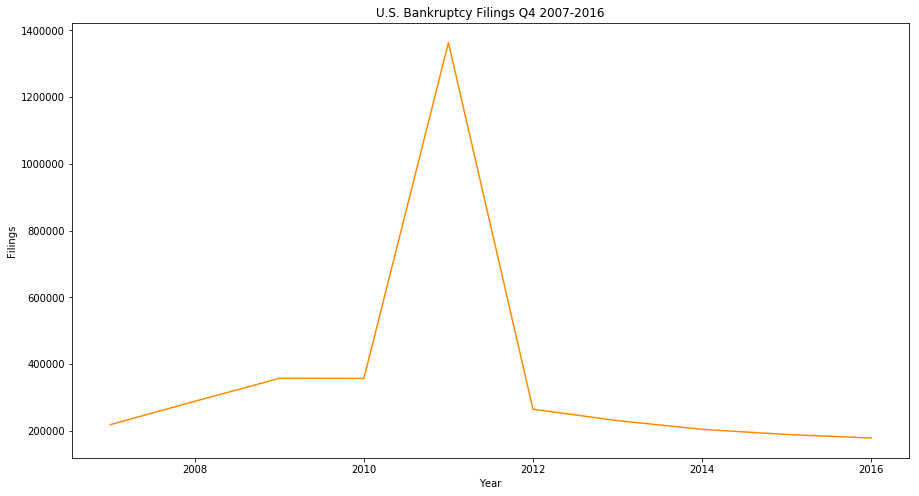

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 8)
import statistics
df2 =pd.read_csv('C:/newfile.csv')
df2 = df2.set_index(['Year'])
a=pd.DataFrame(df2['TOTAL'])
plt.plot(a, color='darkorange')
plt.ylabel('Filings')
plt.xlabel('Year')
plt.title('U.S. Bankruptcy Filings Q4 2007-2016')
plt.show()

### Question 1: Which states saw the most number of non-business bankruptcy filings?   

If we look at the absolute number of filings, California seems to be the state with the maximum number of bankruptcy filings, whereas Alaska has the lowest.   

However, that number is highly skewed as California's population is much higher than that of Alaska. A more appropriate way to perhaps make the comparison would be to look at the filings rate, defined as the number of filings recorded by the state divided by the population of the state. A box-plot chart to plot that data will provide a better understanding of any outliers.   

Normalizing for population, this plot definitely changes the ranking order. While Alaska continues to exhibit the lowest bankruptcy filing rates, the outliers on the higher end of the spectrum are the states of Nevada, Georgia and Tennesse instead of California and Florida.

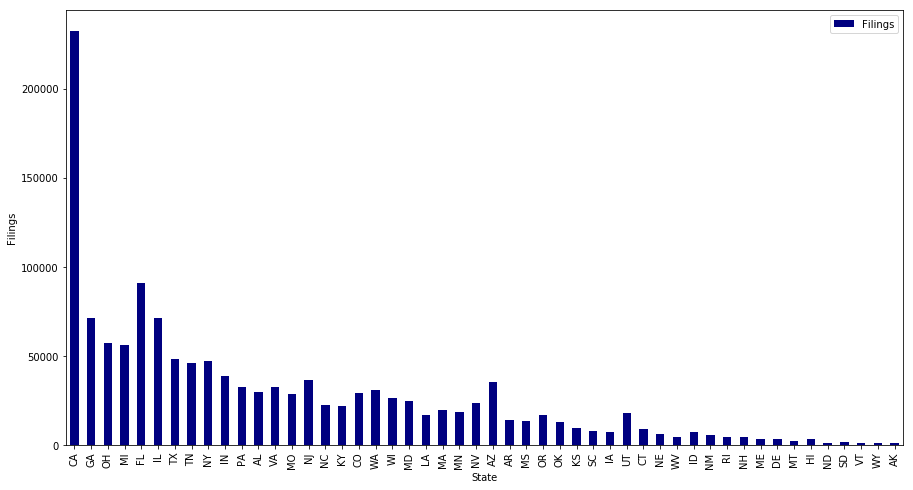

In [2]:
y = pd.DataFrame(df2.drop(['TOTAL'], axis = 1))
fig = plt.figure()
fig.set_size_inches(30, fig.get_figheight(), forward=True)
statesonly =pd.DataFrame(y.max())
statesonly.columns= ['Filings']
statesonly.plot(kind = 'bar', color='navy')
plt.ylabel('Filings')
plt.xlabel('State')
plt.show;

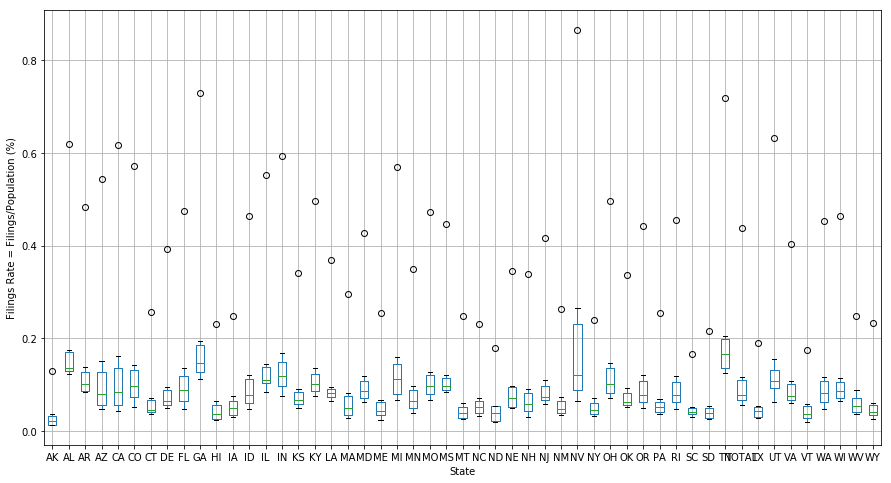

In [3]:
df =pd.read_csv('C:/state_pop2.csv')
c = list(df['Year'])
df = df.set_index(['Year'])
df4 = pd.DataFrame((df2.iloc[0:51]/df.iloc[0:51])*100)
df5 = df4.drop(['TOTAL'], axis = 1)
plt.figure(figsize=(15, 8))
plt.ylabel('Filings Rate = Filings/Population (%)')
plt.xlabel('State')
df4.boxplot();

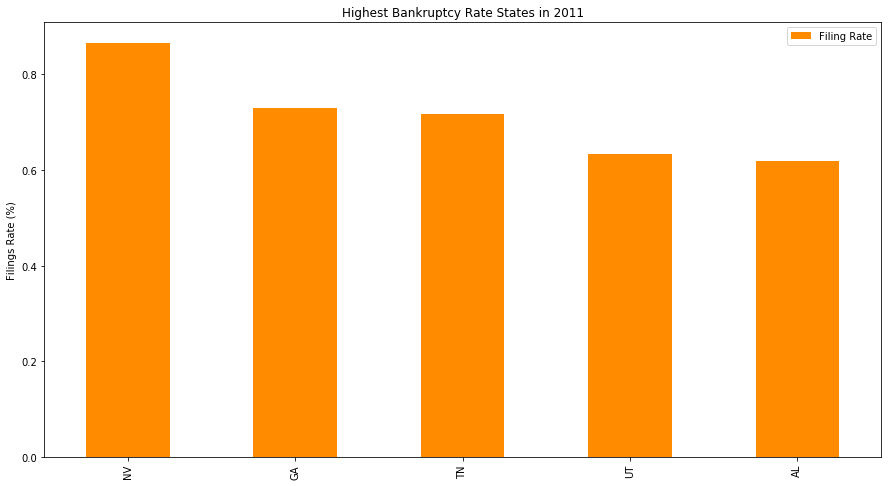

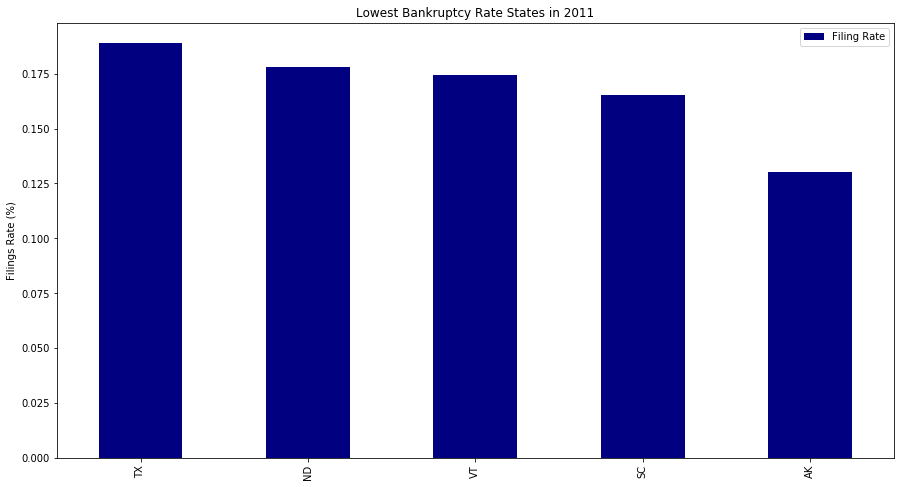

In [4]:
x= pd.DataFrame(df5.iloc[[4]])
x = x.T
x.columns = ['Filing Rate']
sort_x = x.sort_values(by='Filing Rate', ascending=False)
highest = sort_x.head()
lowest = sort_x.tail()
highest.plot(kind='bar', color = 'darkorange')
plt.ylabel('Filings Rate (%)')
plt.title('Highest Bankruptcy Rate States in 2011')
plt.show()
lowest.plot(kind='bar', color = 'navy')
plt.ylabel('Filings Rate (%)')
plt.title('Lowest Bankruptcy Rate States in 2011')
plt.show()

### Question 2: How do other economic factors affect bankruptcy filings?

#### Unemployment   
As corporations cut back on costs, job losses mounted. The unemployment rate, that is defined as those in the workforce who are actively seeking jobs but unable to get them, climed up. Needless to say, no jobs means no income from that job which makes paying bills harder. Is there a correlation between the high unemployment rate and the surge in bankruptcy filings?   

This flat plot, close to the x-axis suggests little correlation between the two variables. The correlation matrix above indicates that there is a feeble positive correlation between the two variables, which means as unemployment rates increase, bankruptcy filing rates should also increase but not at the same rate. Looking at the plot again, there clearly seems to be an outlying value, where the bankruptcy filing rate is unusually high for the corresponding unemployment rate. This plot certainly does not bring out a definitive relationship between the two variables.

In [5]:
df6 =pd.read_csv('C:/unemployment1.csv')
df6 = df6.set_index(['Year'])
a = list(df6['TOTAL'])
b = list(df4['TOTAL'])
corr1 = pd.DataFrame()
corr1['Year']= c
corr1['unemployment'] = a
corr1['filings'] = b
corr1 = corr1.set_index(['Year'])
corr1.corr(method = 'pearson')

,unemployment,filings
unemployment,1.000000,0.489382
filings,0.489382,1.000000


c:\users\mrinalini's pc\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


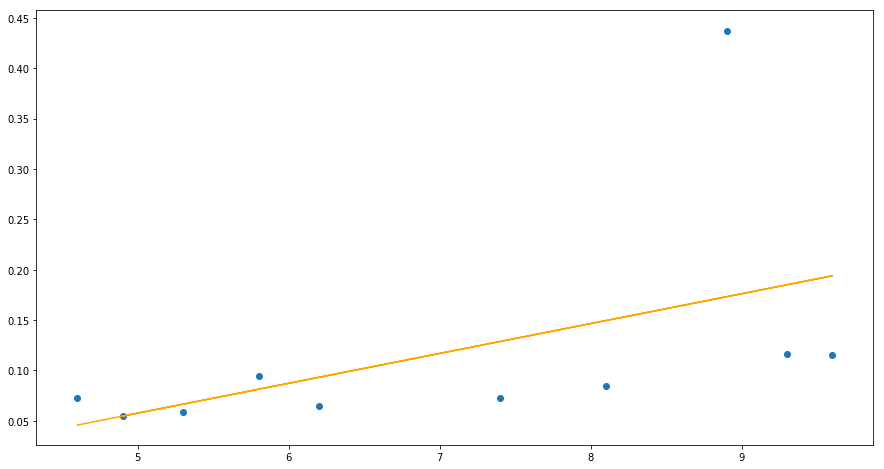

In [6]:
#plt.scatter(x=corr1['unemployment'], y=corr1['filings'])
#plt.xlabel('Unemployment Rate (%)')
#plt.ylabel('Bankruptcy Filings Rate (%)')
#plt.title('Correlation Between Unemployment Rate & Bankruptcy Filing Rate')
#plt.show()

fig, ax = plt.subplots()
fit = np.polyfit(corr1['unemployment'], corr1['filings'], deg=1,)
ax.plot(corr1['unemployment'], fit[0] * corr1['unemployment'] + fit[1], color='orange')
ax.scatter(corr1['unemployment'], corr1['filings'])
fig.show()

#### Mortgage Delinquency   

The roots of the 2008 financial crisis lay in the housing market and subprime mortgages, which basically means mortgages given to people who weren't necessarily equiped to to pay them. Once the housing bubble burst, mortgage delinquencies begun to climb. 90-day delinquencies are considered serious and generally capture borrowers that have missed three or more mortgage payments. Did this play a role in the huge jump in non-business bankruptcy filings in 2011?   

Looking at the correlation matrix, a reasonable degree of positive correlation is observed, which is surprising because the plot being so flat and closed to the x-axis is unable to accurately reflect that.

In [7]:
df8 =pd.read_csv('C:/mortgages.csv')
df8 = df8.set_index(['Year'])
f = list(df8['TOTAL'])
b = list(df4['TOTAL'])
corr2 = pd.DataFrame()
corr2['Year']= c
corr2['mortgage'] = f
corr2['filings'] = b
corr2 = corr2.set_index(['Year'])
corr2.corr(method = 'pearson')

,mortgage,filings
mortgage,1.00000,0.50349
filings,0.50349,1.00000


c:\users\mrinalini's pc\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


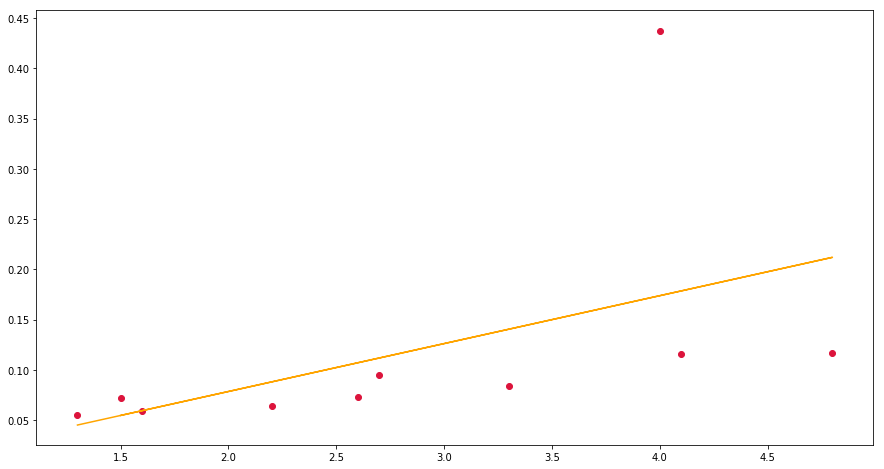

In [8]:
#plt.scatter(x=corr2['mortgage'], y=corr1['filings'], color='crimson')
#plt.xlabel(' 90-Day Mortgage Delinquency Rate (%)')
#plt.ylabel('Bankruptcy Filing Rate (%)')
#plt.title('Correlation Between Serious Mortgage Delinquency & Bankruptcy Filing Rate')
#plt.show()

fig, ax = plt.subplots()
fit = np.polyfit(corr2['mortgage'], corr1['filings'], deg=1)
ax.plot(corr2['mortgage'], fit[0] * corr2['mortgage'] + fit[1], color='orange')
ax.scatter(corr2['mortgage'], corr1['filings'], color ='crimson')
fig.show()


#### Health Expenditures

Healthcare expenditures, though a small part of the the household expenses according to a 2016 [Pew Research study](http://www.pewtrusts.org/en/research-and-analysis/issue-briefs/2016/03/household-expenditures-and-income), some experts believe that medical bills can be substantial and ptentially even lead to bankruptcy.   

A 2014 [study](http://digitalcommons.mainelaw.maine.edu/cgi/viewcontent.cgi?article=1079&context=mlr) by bankruptcy attorney Daniel Austin, then a professor at the Northeastern University School of Law, found that medical debt is the single largest factor in consumer bankruptcy. Nearly 26% of people who were part of that study – and had filed for bankruptcy – reported that their medical bills drove them to it. In this section I'll try to examine if any correlation exists between out of pocket healthcare expenses and bankruptcy filings.   

The correlation matrix below indicates an extremely feeble yet positive relationship between the two variables. The flat scatter plot indicating low correlation between bankruptcy filing rate and growth in out of pocket health expenses also reflects the same, though it gives no clarity on the positive or negative nature of this relationship. This picture takes us in the direction of considering the 2011 spike in bankruptcy filings as an anomaly.


In [9]:
df9 =pd.read_csv('C:/health.csv')
df9 = df9.set_index(['Year'])
g = list(df9['opexpenses'])
h = list(df9['expensesgrowth'])
b = list(df4['TOTAL'])
corr3 = pd.DataFrame()
corr3['Year']= c
corr3['expensesgrowth'] = h
corr3['filings'] = b
corr3 = corr3.set_index(['Year'])
corr3.corr(method = 'pearson')

,expensesgrowth,filings
expensesgrowth,1.000000,0.049704
filings,0.049704,1.000000


c:\users\mrinalini's pc\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


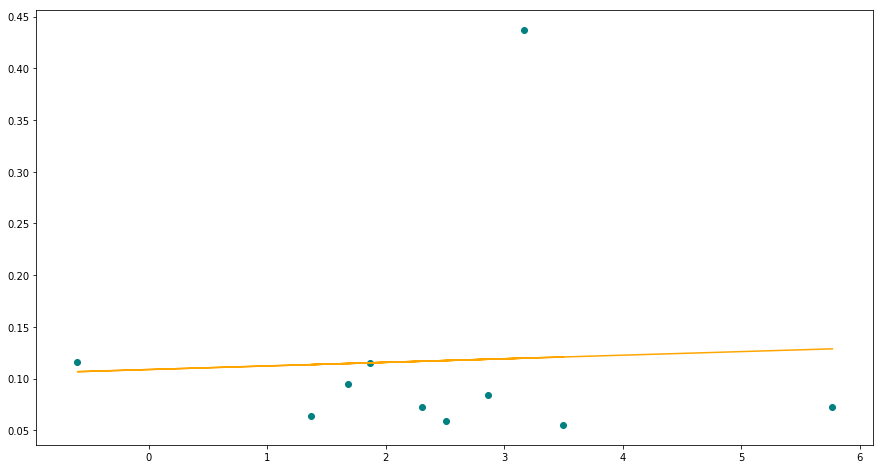

In [10]:
#plt.scatter(x=corr3['expensesgrowth'], y=corr1['filings'], color='teal')
#plt.xlabel('Growth of Health Expenses (%)')
#plt.ylabel('Bankruptcy Filings Rate (%)')
#plt.title('Correlation Between Health Expenses Growth & Bankruptcy Filing Rate')
#plt.show()

fig, ax = plt.subplots()
fit = np.polyfit(corr3['expensesgrowth'], corr1['filings'], deg=1)
ax.plot(corr3['expensesgrowth'], fit[0] * corr3['expensesgrowth'] + fit[1], color='orange')
ax.scatter(corr3['expensesgrowth'], corr1['filings'], color = 'teal')
fig.show()

### Question 3: Does it all add up, once the outlier is removed?   

If we consider the 2011 surge in bankruptcy filings, does the rest of the data then make more sense if we run the same analysis without the outlier?


When we look atthe total filings between 2007 and 2016, excluding the exceptionally high number for 2011, we do see a general spike between 2010 and 2012. The sharp peak does prove that while 2011 may have been an outlier, it wasn't completely amiss as bankrutpcy filings were on a rise since 2007 and did begin to drop after 2010. Having said that, this trend was hidden by the big number 2011 and not clearly brought out by th first graph in this analysis.

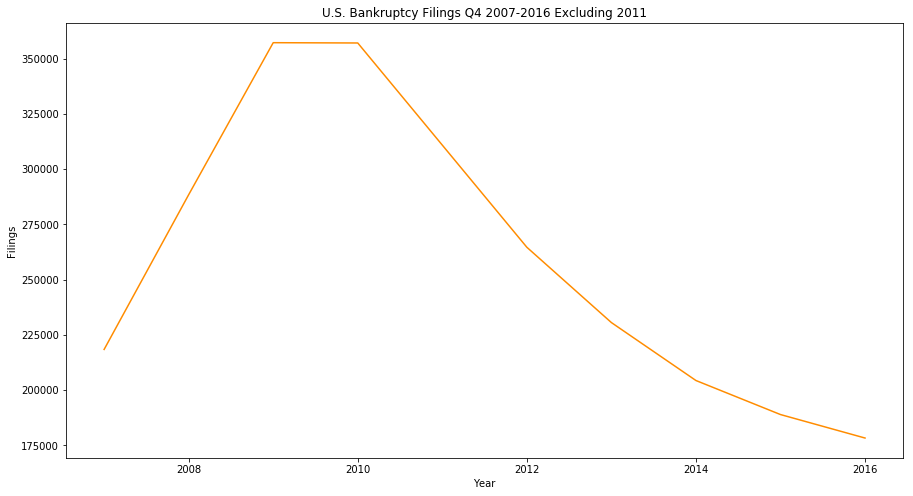

In [11]:
df2 =pd.read_csv('C:/newfile.csv')
j = df2.drop(df2.index[4])
j = j.set_index(['Year'])
plt.plot(j['TOTAL'], color='darkorange')
plt.ylabel('Filings')
plt.xlabel('Year')
plt.title('U.S. Bankruptcy Filings Q4 2007-2016 Excluding 2011')
plt.show()

#### Relationship with Unemployment, Mortgages and Healthcare Expenditure:   

If we take the 2011 outlier, the bankruptcy filings data begins to start making more sense.   

If we now try and examine the correlation between the bankruptcy filings rate and the other economic variables, the results would be significanlty different due to the removal of the outlier. With correlation coefficients of 0.81 and 0.92, unemployment rate and mortgage delinquency rate exhibit a very high degree of positive correlation with the filings rate. Meanwhile growth of out of pocket medical expenses, surprisingly, according to these figures shares a negative relationship with bankruptcy filings.

Plotting the filings rate with other varaibles reaffirms the relationships suggested by the correleation coefficients. 

In [12]:
df2 =pd.read_csv('C:/newfile.csv')
df =pd.read_csv('C:/state_pop2.csv')
c = list(df['Year'])
dfz = pd.DataFrame((df2.iloc[0:51]/df.iloc[0:51])*100)
df6 =pd.read_csv('C:/unemployment1.csv')
df8 =pd.read_csv('C:/mortgages.csv')
df9 =pd.read_csv('C:/health.csv')
filing = list(dfz['TOTAL'])
unemploy = list(df6['TOTAL'])
mortgage = list(df8['TOTAL'])
health = list(df9['expensesgrowth'])
combined = pd.DataFrame()
combined['Year'] = c
combined['Filing_Rate'] = filing
combined['Unemployment_Rate'] = unemploy
combined['Mortgage_Delinquency'] = mortgage
combined['Health_Exp_Growth'] = health
combined = combined.drop(combined.index[4])
combined = combined.set_index(['Year'])
combined

,Filing_Rate,Unemployment_Rate,Mortgage_Delinquency,Health_Exp_Growth
Year,,,,
2007,0.072512,4.6,1.5,5.77
2008,0.094844,5.8,2.7,1.68
2009,0.116433,9.3,4.8,-0.60
2010,0.115420,9.6,4.1,1.87
2012,0.084283,8.1,3.3,2.86
2013,0.072922,7.4,2.6,2.31
2014,0.064154,6.2,2.2,1.37
2015,0.058889,5.3,1.6,2.51
2016,0.055196,4.9,1.3,3.50


In [13]:
comcorr= pd.DataFrame(combined.corr())
comcorr.iloc[0:1]

,Filing_Rate,Unemployment_Rate,Mortgage_Delinquency,Health_Exp_Growth
Filing_Rate,1.0,0.816532,0.925277,-0.551575


c:\users\mrinalini's pc\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


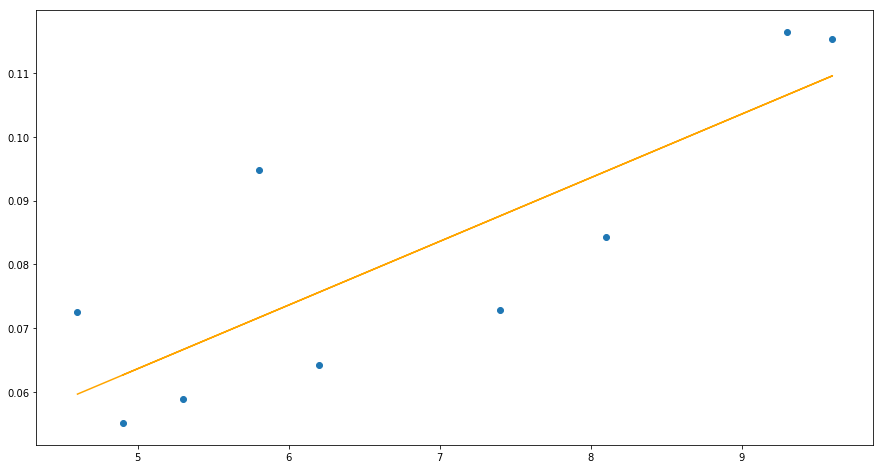

In [14]:
fig, ax = plt.subplots()
fit = np.polyfit(combined['Unemployment_Rate'], combined['Filing_Rate'], deg=1,)
ax.plot(combined['Unemployment_Rate'], fit[0] * combined['Unemployment_Rate'] + fit[1], color='orange')
ax.scatter(combined['Unemployment_Rate'], combined['Filing_Rate'])
fig.show()

c:\users\mrinalini's pc\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


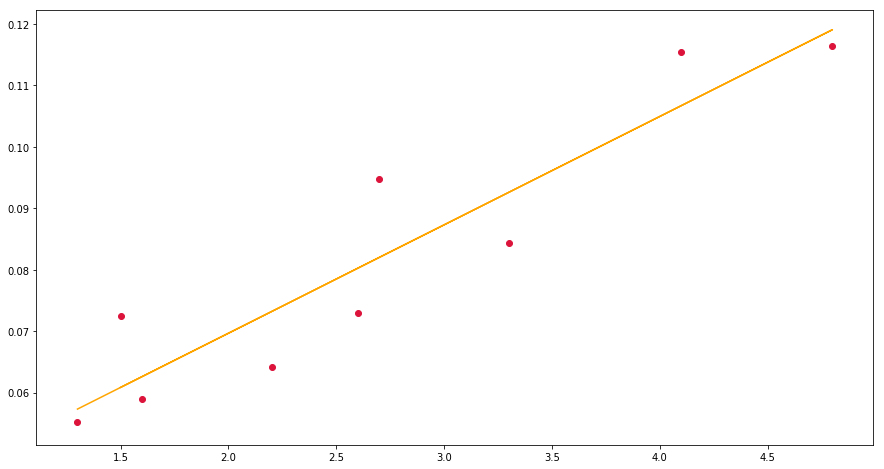

In [15]:
fig, ax = plt.subplots()
fit = np.polyfit(combined['Mortgage_Delinquency'], combined['Filing_Rate'], deg=1)
ax.plot(combined['Mortgage_Delinquency'], fit[0] * combined['Mortgage_Delinquency'] + fit[1], color='orange')
ax.scatter(combined['Mortgage_Delinquency'], combined['Filing_Rate'], color ='crimson')
fig.show()

c:\users\mrinalini's pc\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


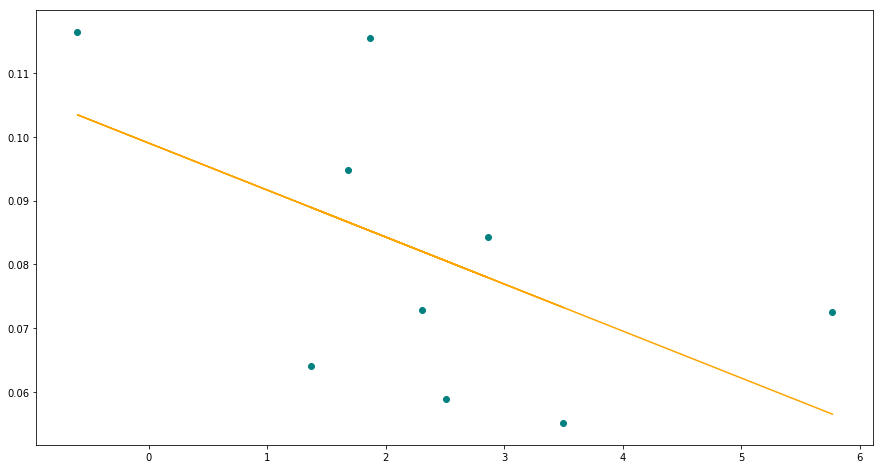

In [16]:
fig, ax = plt.subplots()
fit = np.polyfit(combined['Health_Exp_Growth'], combined['Filing_Rate'], deg=1)
ax.plot(combined['Health_Exp_Growth'], fit[0] * combined['Health_Exp_Growth'] + fit[1], color='orange')
ax.scatter(combined['Health_Exp_Growth'], combined['Filing_Rate'], color = 'teal')
fig.show()

## Results   

From the analysis above, it is concluded that personal bankruptcies in the United States rose between 2007 and 2010, after which they began to decline. The surprising outlier is the year 2011, where a big jump in the number of filings siginificantly skews the data. The reason for this surge could not be concluded from thsi analysis and would require further research.   

Further, from this analysis is it also concluded that it is more appropriate to consider bankruptcy filings rate for a better insight into state data. Further research may be conducted on states with the highest or lowest bankruptcy rates to determine endemic factors responsible for infulencing the variable.   

It is also concluded that unemployment rate and mortgage delinquency rates share a strong positive correlation with bankruptcy rates and could in future be used to guage and project bankruptcy filings. Out of pocket healthcare, surprisingly, bear little or inverse correlation with bankruptcy filings according to this data. Further research may be conducted to understand this counter-intuitive finding from this dataset. 

## Further Research   

As mentioned above, the big jump in bankruptcy filings is an anamoly in this dataset but an intriguing datapoint that needs to be looked into further. Further examination of whether the data itself is misleading or there is one or more exceptional circumstances driving it is recommended.   

An in-depth look into states with the highest and lowest bankruptcy filings rates is proposed to understand factors endemic and limited to certain geographic area that could influence state and potentially skew national filing numbers.   

With the out-of-pocket healthcare spending data exhibiting a negative correlation with bankruptcy, further research is proposed to understand that phenomenon. A possible explanation maybe increase in the healthcare expenses on account of increased health insurance enrollment under the Affordable Care Act. That would mean higher out of pocket expenses in totoal because more people are now paying for healthcare but those expenses per capita may not be enough to drive people to bankruptcy. That hypothesis could be tested through further study.   
